# Project-Machine learning based model for Phishing attack detection

# Problem Statement-To find whether the Website URL is Phishing or legitimate

In [ ]:
#target variable =label (categorical)

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#data processing functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("result.csv")
df.head(20)

,Sr. No.,Domain Name,URL Length,Is IP as Host name,Is .exe present,Is www present,FTP used,.js used,Files in URL,css used,...,mailto: present,Frame tag present,Is title tag empty,Eval() function,Escape() function,Exec() Function,Search() function,Is image only in webpage,Domain Age in Days,Label
0,1,google.com,22,False,False,False,False,False,False,False,...,False,False,False,0,0,0,3,False,3431,0
1,2,youtube.com,23,False,False,False,False,False,False,False,...,False,True,False,0,0,0,0,False,3431,0
2,3,facebook.com,24,False,False,False,False,False,False,False,...,False,True,False,0,0,0,0,False,2346,0
3,4,wikipedia.org,25,False,False,False,False,False,False,False,...,False,False,False,0,0,0,0,False,0,0
4,5,yahoo.com,21,False,False,False,False,False,False,False,...,False,True,False,0,0,3,0,False,0,0
5,6,google.co.in,24,False,False,False,False,False,False,False,...,False,False,False,0,0,0,3,False,3431,0
6,7,reddit.com,22,False,False,False,False,False,False,False,...,False,True,False,0,0,0,0,False,2010,0
7,8,qq.com,18,False,False,False,False,False,False,False,...,False,False,False,0,0,0,0,False,2733,0
8,9,twitter.com,23,False,False,False,False,False,False,False,...,False,True,False,0,0,0,0,False,2503,0
9,10,tmall.com,21,False,False,False,False,False,False,False,...,False,False,False,0,0,0,0,False,2009,0


In [ ]:
#If label=0(phishing)
#If label=1(legitimate)

In [ ]:
df.describe()

,Sr. No.,URL Length,Digit to alphabet ratio,Special Char to Alphabet Ratio,Uppercase to LowercaseRatio,Domain to URL Ratio,Numeric Character,English Letters,Special Characters,Dots,...,Number of fragments,Body tags in source,Meta tag in source,Div tag in source,Eval() function,Escape() function,Exec() Function,Search() function,Domain Age in Days,Label
count,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,500.50000,53.106667,0.085762,0.240987,0.018204,0.468470,5.064833,39.288167,8.752167,2.688667,...,0.001500,0.506667,8.473833,121.348833,0.032333,0.105667,0.124167,0.090000,1265.819167,0.500000
std,288.69905,41.522114,0.205870,0.081068,0.072466,0.206061,17.238382,26.216776,5.419100,1.593579,...,0.038704,0.646549,16.581329,359.418742,0.379884,0.852617,0.908416,0.554333,2163.382247,0.500042
min,1.00000,6.000000,0.000000,0.043500,0.000000,0.033800,0.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.75000,25.000000,0.000000,0.190500,0.000000,0.290300,0.000000,20.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.50000,40.000000,0.000000,0.236800,0.000000,0.468800,0.000000,31.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,750.25000,64.000000,0.085100,0.290300,0.000000,0.666700,4.000000,51.000000,11.000000,3.000000,...,0.000000,1.000000,14.000000,134.000000,0.000000,0.000000,0.000000,0.000000,2433.000000,1.000000
max,1000.00000,779.000000,4.744400,2.159100,1.181800,0.944800,631.000000,298.000000,95.000000,17.000000,...,1.000000,24.000000,370.000000,14114.000000,11.000000,42.000000,37.000000,15.000000,13942.000000,1.000000


In [ ]:
df.dtypes

Sr. No.                      int64
Domain Name                 object
URL Length                   int64
Is IP as Host name            bool
Is .exe present               bool
                             ...  
Exec() Function              int64
Search() function            int64
Is image only in webpage    object
Domain Age in Days           int64
Label                        int64
Length: 92, dtype: object

In [ ]:
column_encodings={}

for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool':  # Check if the column contains string data
        unique_values = df[column].unique()
        encoding = {val: idx + 1 for idx, val in enumerate(unique_values)}
        df[column] = df[column].map(encoding)
        column_encodings[column] = encoding


In [ ]:
df.head(10)

,Sr. No.,Domain Name,URL Length,Is IP as Host name,Is .exe present,Is www present,FTP used,.js used,Files in URL,css used,...,mailto: present,Frame tag present,Is title tag empty,Eval() function,Escape() function,Exec() Function,Search() function,Is image only in webpage,Domain Age in Days,Label
0,1,1,22,1,1,1,1,1,1,1,...,1,1,1,0,0,0,3,1,3431,0
1,2,2,23,1,1,1,1,1,1,1,...,1,2,1,0,0,0,0,1,3431,0
2,3,3,24,1,1,1,1,1,1,1,...,1,2,1,0,0,0,0,1,2346,0
3,4,4,25,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,1,0,0
4,5,5,21,1,1,1,1,1,1,1,...,1,2,1,0,0,3,0,1,0,0
5,6,6,24,1,1,1,1,1,1,1,...,1,1,1,0,0,0,3,1,3431,0
6,7,7,22,1,1,1,1,1,1,1,...,1,2,1,0,0,0,0,1,2010,0
7,8,8,18,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,1,2733,0
8,9,9,23,1,1,1,1,1,1,1,...,1,2,1,0,0,0,0,1,2503,0
9,10,10,21,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,1,2009,0


In [ ]:
df.shape #there are 6000 rows and 92 columns in this dataset

(6000, 92)

In [ ]:
df.describe()

,Sr. No.,Domain Name,URL Length,Is IP as Host name,Is .exe present,Is www present,FTP used,.js used,Files in URL,css used,...,mailto: present,Frame tag present,Is title tag empty,Eval() function,Escape() function,Exec() Function,Search() function,Is image only in webpage,Domain Age in Days,Label
count,6000.00000,6000.000000,6000.000000,6000.0,6000.0,6000.000000,6000.0,6000.000000,6000.000000,6000.00000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,500.50000,2568.148333,53.106667,1.0,1.0,1.167667,1.0,1.004000,1.004333,1.00850,...,2.108333,2.332667,1.500000,0.032333,0.105667,0.124167,0.090000,1.500000,1265.819167,0.500000
std,288.69905,1603.194640,41.522114,0.0,0.0,0.373601,0.0,0.063124,0.065691,0.09181,...,0.938124,0.746163,0.500042,0.379884,0.852617,0.908416,0.554333,0.500042,2163.382247,0.500042
min,1.00000,1.000000,6.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,250.75000,1061.750000,25.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.00000,...,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,500.50000,2474.500000,40.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.00000,...,2.500000,2.500000,1.500000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.500000
75%,750.25000,3966.250000,64.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.00000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2433.000000,1.000000
max,1000.00000,5463.000000,779.000000,1.0,1.0,2.000000,1.0,2.000000,2.000000,2.00000,...,3.000000,3.000000,2.000000,11.000000,42.000000,37.000000,15.000000,2.000000,13942.000000,1.000000


# Outlier detection and removal through IQR method

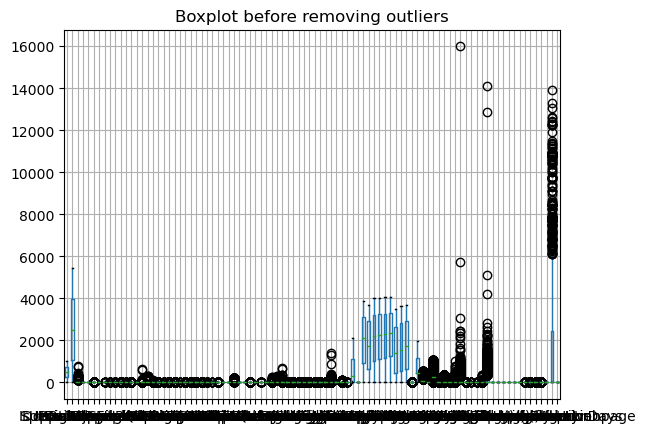

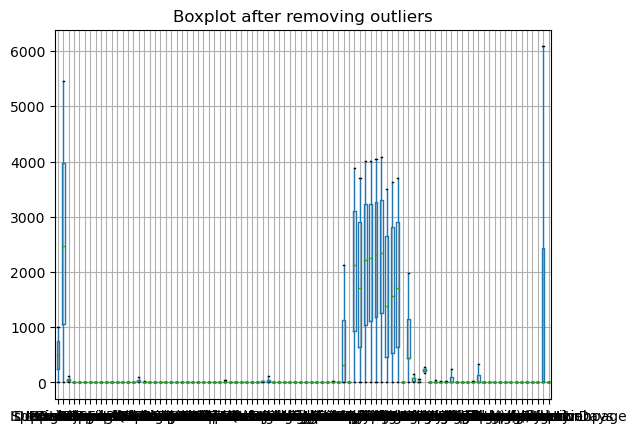

In [ ]:
import matplotlib.pyplot as plt
def remove_outliers(col):
    sorted_col = np.sort(col)
    q1, q3 = np.percentile(col, [25, 75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    return np.where(col > upr_bound, upr_bound, np.where(col < lwr_bound, lwr_bound, col))

# Display boxplot before removing outliers
df.boxplot()
plt.title("Boxplot before removing outliers")
plt.show()

# Remove outliers from all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(remove_outliers)

# Display boxplot after removing outliers
df.boxplot()
plt.title("Boxplot after removing outliers")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sr. No.                         6000 non-null   float64
 1   Domain Name                     6000 non-null   float64
 2   URL Length                      6000 non-null   float64
 3   Is IP as Host name              6000 non-null   float64
 4   Is .exe present                 6000 non-null   float64
 5   Is www present                  6000 non-null   float64
 6   FTP used                        6000 non-null   float64
 7   .js used                        6000 non-null   float64
 8   Files in URL                    6000 non-null   float64
 9   css used                        6000 non-null   float64
 10  Digit to alphabet ratio         6000 non-null   float64
 11  Special Char to Alphabet Ratio  6000 non-null   float64
 12  Uppercase to LowercaseRatio     60

# Checking the missing values
if missing values are present in the dataset then replace them with mean,median or mode

In [ ]:
missing_values = df.isnull().sum()

print(missing_values) #there are no missing values in this dataset

Sr. No.                     0
Domain Name                 0
URL Length                  0
Is IP as Host name          0
Is .exe present             0
                           ..
Exec() Function             0
Search() function           0
Is image only in webpage    0
Domain Age in Days          0
Label                       0
Length: 92, dtype: int64


<Axes: >

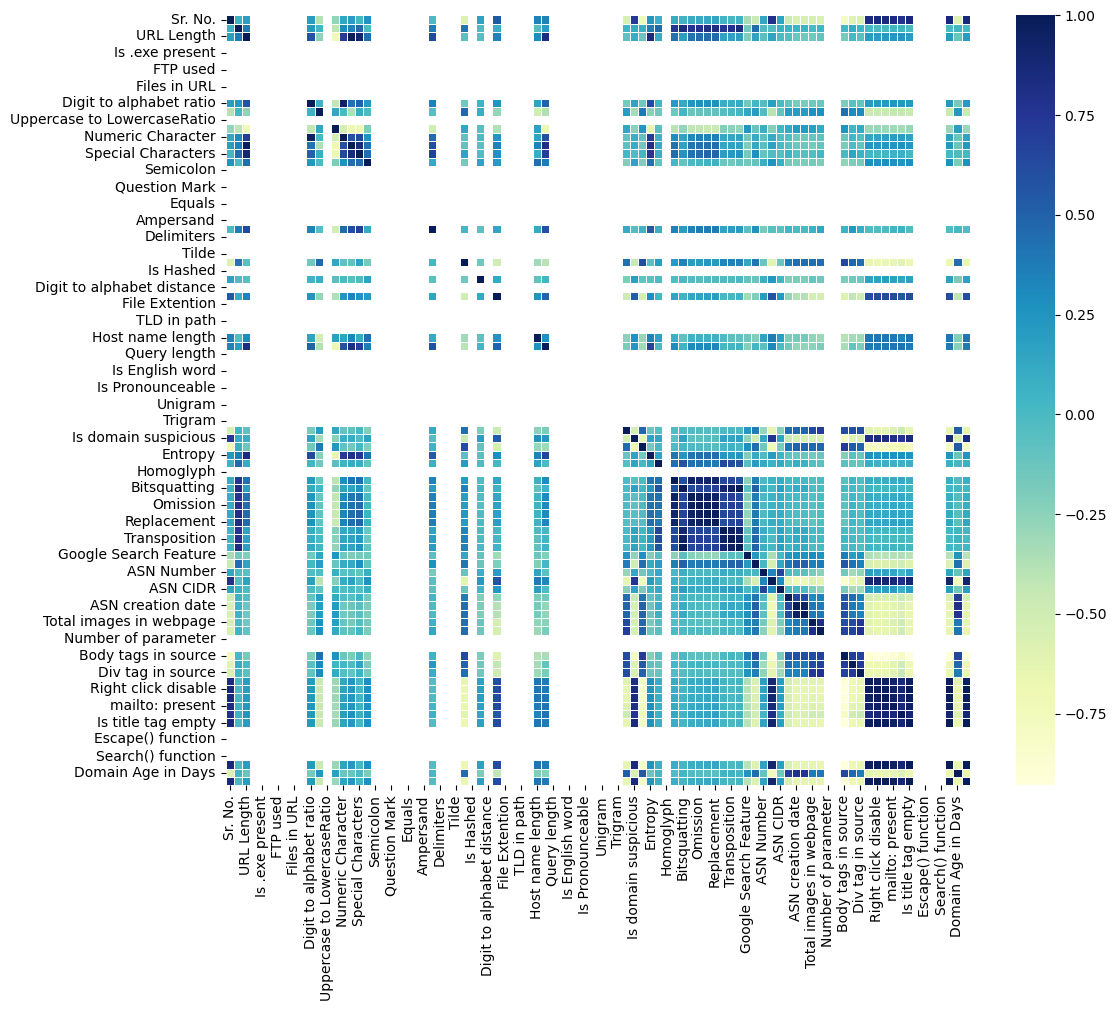

In [ ]:
#correlation matrix is used to see the degree to which the two variables are related
# where 1 indicates perfect correlation
#0 =no correlation
#-1= negative correlation
correlation_mat=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_mat, annot=False, linewidths=.4, cmap="YlGnBu")

# Training and Testing the dataset

In [ ]:
X= df.drop(columns='Label')#independent variable
y=df['Label']#target variable
###training and testing split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
#Logistic Regression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 1.0


In [ ]:
#using Principal Component Analysis (PCA) which  dimensionality reduction technique  that will discard the features with lower variance or impact

pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
logistic_model.fit(X_train_pca, y_train)
# Make predictions on the PCA-transformed test data
y_pred_pca = logistic_model.predict(X_test_pca)
# Calculate accuracy after PCA
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)  #the score is good and since the target value is
                                                          #categorical that is why we have applied logistic regression
# Print the accuracy
print(f"Accuracy after PCA: {accuracy_after_pca}")

Accuracy after PCA: 0.9855555555555555


# Using different classification models

In [ ]:
# The decision tree is a tree-like model where each internal node represents a decision based on the values of one or more
#features, and each leaf node represents the predicted class label.

In [ ]:
# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 1.0


In [ ]:
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train) #we have applied fit_transform on training data so that it learns the features and then
#applies it but we have applied transform only on test data to prevent data leakage so that model leanrs only from train data
#and not from test data so that it does not forget how to generalize the data and then evaluate the new unseen data
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")

Accuracy after PCA: 0.9944444444444445


In [ ]:
#A Random Forest Classifier is an ensemble learning method that combines the predictions of multiple individual decision
#trees to improve overall performance and generalization.

In [ ]:
#Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 1.0


Accuracy after PCA: 0.9961111111111111


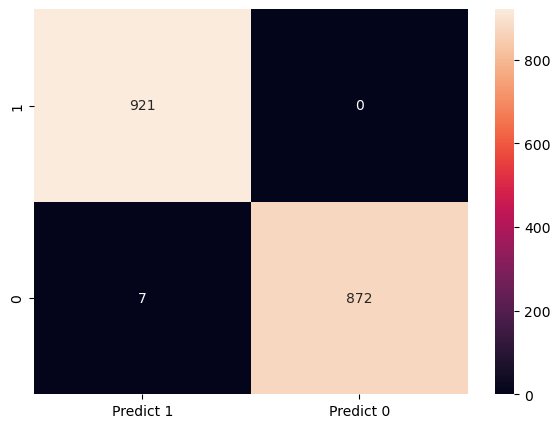

In [ ]:
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred_pca,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],  ##This part specifies the row indices of the DataFrame. It creates
                                                   #list containing the strings "1" and "0" and uses it as the index for the rows.
columns=[i for i in ["Predict 1","Predict 0"]])  ##It sets the row indices to be "1" and "0" and the
                                                 #column names to be "Predict 1" and "Predict 0".
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
print(f"Accuracy after PCA: {accuracy_after_pca}")


In [ ]:
 #In Ada Boost classifier we first build a model on the training dataset and then build a second model to rectify the errors
    #present in the first model. This procedure is continued until and unless the errors are minimized and the dataset is
    #predicted correctly.

In [ ]:
#Ada Boost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 1.0


In [ ]:
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")


Accuracy after PCA: 0.9938888888888889


In [ ]:
#SVC Classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
model.score(X_train,y_train)



0.9957142857142857

In [ ]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 1.0


In [ ]:
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")


Accuracy after PCA: 0.995


# Using linear regression to check the score - that why it cannot be applied on this dataset where target variable is categorical

In [ ]:
#LInear Regression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
accuracy = mean_squared_error(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 1.1655518482253602e-28


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
m3=DecisionTreeRegressor()
m3.fit(X_train, y_train)
y_test_pred = m3.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 1.0


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
m3.fit(X_pca,y)
y_pred_pca = m3.predict(X_test_pca)
accuracy_after_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")

Accuracy after PCA: 0.008333333333333333


In [ ]:
#Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
m4=AdaBoostRegressor()
m4.fit(X_train, y_train)
y_test_pred = m4.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 1.0


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
m4.fit(X_pca,y)
y_pred_pca = m4.predict(X_test_pca)
accuracy_after_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")

Accuracy after PCA: 0.02077687214545509


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
m6=RandomForestRegressor()
m6.fit(X_train, y_train)
y_test_pred = m6.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 1.0


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
m6.fit(X_pca,y)
y_pred_pca = m6.predict(X_test_pca)
accuracy_after_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after_pca}")

Accuracy after PCA: 0.004802666666666667
